In [60]:
import pandas as pd
from glob import glob
import numpy as np
%matplotlib inline
import seaborn as sns
import re

In [5]:
events = pd.read_table('D:/neuroscout/datasets/forrest/sub-01/ses-movie/func/sub-01_ses-movie_task-movie_run-1_events.tsv')

In [6]:
results = [pd.read_csv(f) for f in glob('forrest_extract_results/clip*')]

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (272,273,292,293,398,399,401,402,403,422,423,528,529,531,532,533,552,553,658,659,661,662,663,682,683,788,789,791,792,793,812,813,918,919,921,922,923,942,943,1048,1049,1051) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (12,13,32,33,138,139,141,142,143,162,163,268,269,271,272,273,292,293,398,399,401,402,403,422,423,528,529,531,532,533,552,553,658,659,661,662,663,682,683,788,789,791,792,793,812,813,918,919,921,922,923,942,943,1048,1049,1051,1312,1313,1332,1333,1438,1439,1441,1442,1443,1462,1463,1568,1569,1571,1572,1573,1592,1593,1698,1699,1701,1702,1703,1722,1723,1828,1829,1831,1832,1833,1852,1853,1958,1959,1961,1962,1963,1982,1983,2088,2089,2091,2092,2093,2112,2113,2218,2219,2221) have mixed types. Specify dtype optio

In [72]:
run = results[0]

In [50]:
movie_start = run.iloc[0].onset

In [11]:
confidence_cols = [c for c in run.columns if c.endswith('face_detectionConfidence')]

In [88]:
run['numFaces'] = (run.iloc[0][confidence_cols].isnull() == False).sum()

In [67]:
run['maxFace'] = run.apply(lambda x: x[confidence_cols].idxmax(), axis=1)

In [49]:
def polyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [76]:
def computeFaceArea(row):
    maxcol = row['maxFace']
    
    if pd.notnull(maxcol):
        prepend = re.sub('face_detectionConfidence', '', maxcol)
        x = []
        y = []
        
        for i in range(1, 5):
            x.append(row[prepend + 'boundingPoly_vertex{}_x'.format(i)])
            y.append(row[prepend + 'boundingPoly_vertex{}_y'.format(i)])
            
        val = polyArea(x, y)
    else:
        val = 0
    return val

In [80]:
computeFaceArea(run.iloc[800])

111600.0

In [26]:
def setmaxConfidence(row):
    maxcol = row['maxFace']
    if pd.notnull(maxcol):
        val = row[maxcol]
    else:
        val = 0
    return val

In [27]:
run['max_faceConfidence'] = run.apply(setmaxConfidence, axis=1)

In [55]:
run['onset'] = run['onset'] + movie_start
run = run[['onset', 'duration', 'max_faceConfidence']]

In [66]:
run[['onset', 'duration', 'max_faceConfidence', 'random']]

KeyError: "['random'] not in index"

In [62]:
run = pd.melt(run, id_vars=['onset', 'duration'], value_name='amplitude', var_name='trial_type')

,onset,duration,trial_type,amplitude
0,0.00,0.48,max_faceConfidence,0.000000
1,0.48,0.48,max_faceConfidence,0.000000
2,0.96,0.48,max_faceConfidence,0.000000
3,1.44,0.48,max_faceConfidence,0.000000
4,1.92,0.48,max_faceConfidence,0.000000
5,2.40,0.48,max_faceConfidence,0.000000
6,2.88,0.48,max_faceConfidence,0.000000
7,3.36,0.48,max_faceConfidence,0.000000
8,3.84,0.48,max_faceConfidence,0.000000
9,4.32,0.48,max_faceConfidence,0.000000


In [4]:
relevant_cols = ['angerLikelihood', 'blurredLikelihood','face_detectionConfidence',
                'headwearLikelihood', 'joyLikelihood', 'sorrowLikelihood', 'surpriseLikelihood', 
                 'underExposedLikelihood']

In [39]:
results['max_face'] = results.apply(lambda row: row[confidence_cols].idxmax(), axis=1)

Percentage of frames without a single face detected:

In [ ]:
results['max_face'].isnull().mean()

In [157]:
face_results = results[results['max_face'].isnull() == False]

In [158]:
face_results.max_face = face_results.max_face.apply(lambda x: x[:-24])

In [172]:
max_face_results = []
for i, row in face_results.iterrows():
    vals = row[[row.max_face +  c for c in relevant_cols]].sort_values().values
    max_face_results.append(vals)

In [173]:
columns = row[[row.max_face +  c for c in relevant_cols]].sort_values().index.tolist()
max_face_results = pd.DataFrame(max_face_results, columns=columns)

In [174]:
likelihood_map = dict(zip(max_face_results.angerLikelihood.unique()[0:], range(7)))

In [175]:
likelihood_map = {'LIKELY': 4,
 'POSSIBLE': 2,
 'UNLIKELY': 1,
 'VERY_LIKELY': 4,
 'VERY_UNLIKELY': 0}

In [176]:
for rn, row in max_face_results.iteritems():
   if rn != 'face_detectionConfidence':
    max_face_results[rn] = row.map(likelihood_map)

In [177]:
max_face_results.mean()

face_detectionConfidence    0.872379
joyLikelihood               1.357194
angerLikelihood             0.258479
blurredLikelihood           0.013924
headwearLikelihood          0.000893
sorrowLikelihood            0.000000
surpriseLikelihood          0.000000
underExposedLikelihood      0.000000
dtype: float64

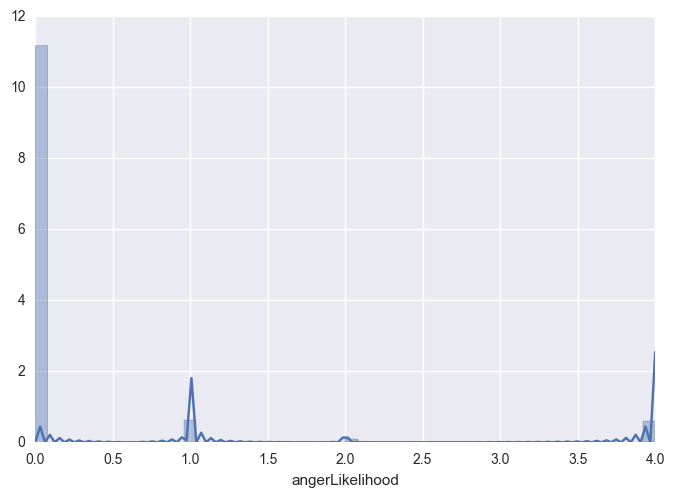

In [181]:
sns.distplot(max_face_results.angerLikelihood)

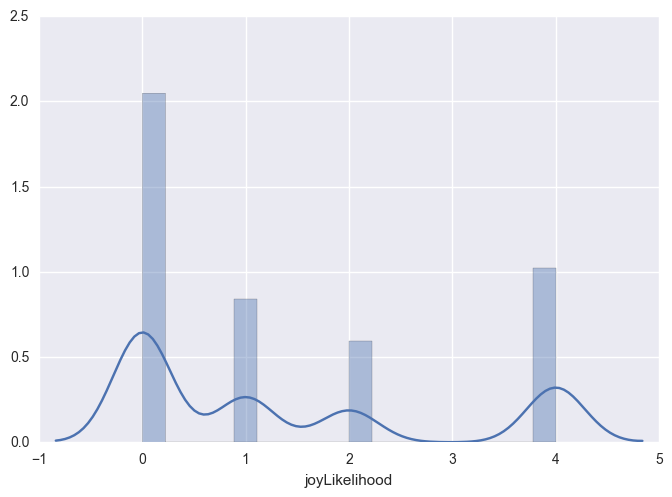

In [180]:
sns.distplot(max_face_results.joyLikelihood)

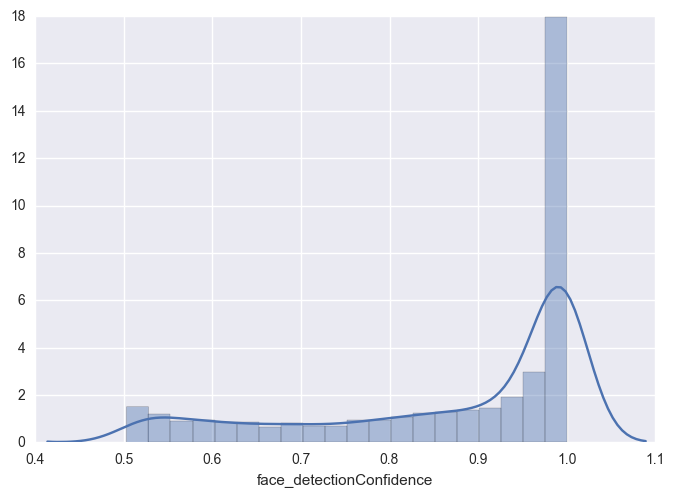

In [183]:
sns.distplot(max_face_results.face_detectionConfidence)